# Settings

In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')        # once is enough
nltk.download('stopwords')    # once is enough
# stopwords.words('english')[0:10]

text = 'Statistics skills, and programming skills are equally important for analytics. Statistics skills, and domain knowledge are important for analytics. I like reading books and travelling.'
text

[nltk_data] Downloading package punkt to /Users/hwan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hwan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Statistics skills, and programming skills are equally important for analytics. Statistics skills, and domain knowledge are important for analytics. I like reading books and travelling.'

# Processing

In [12]:
def process_text(text, lang='english'):
    text = re.sub(r'\d+', '', text)
    words = nltk.word_tokenize(text)
    punt_removed= [w for w in words if w.lower() not in string.punctuation]
    text = " ".join(punt_removed)
    words = nltk.word_tokenize(text)
    lang_stopwords= stopwords.words(lang)
    stopwords_removed= [w for w in words if w.lower() not in lang_stopwords]
    text = " ".join(stopwords_removed)
    return " ".join(text.split())    

In [13]:
process_text(text_processed)

NameError: name 'text_processed' is not defined

# Tokenize

In [131]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text_processed)
TEXT_WORD_LIST = tokens
TEXT_STRING = ' '.join(tokens)
display(TEXT_WORD_LIST[0:5], TEXT_STRING)

['statistics', 'skills', 'programming', 'skills', 'equally']

'statistics skills programming skills equally important analytics statistics skills domain knowledge important analytics like reading books travelling'

# Wordcloud

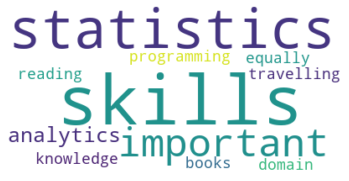

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = TEXT_STRING

# x, y = np.ogrid[:300, :300]

# mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
# mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white") #, repeat=True) #, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Wordcloud.2
 - with image

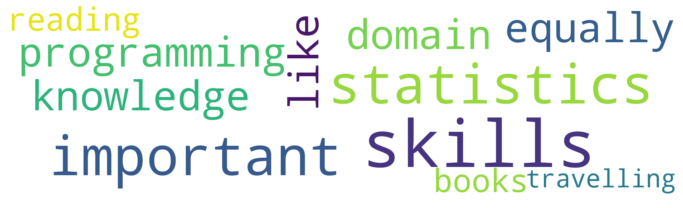

In [160]:
import os
import re
import matplotlib.pyplot as plt
import multidict as multidict
import numpy as np
import random
from os import path
from PIL import Image
from wordcloud import WordCloud

def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


def makeImage(text):
    alice_mask = np.array(Image.open("./img/bg.png"))
    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    wc.generate_from_frequencies(text)   # generate word cloud
    plt.figure(figsize=(12,4))       
    plt.imshow(wc, interpolation="bilinear")
    plt.imshow(wc.recolor(random_state=505), interpolation="bilinear")   # color_func=grey_color_func, 
    plt.axis("off")
    plt.show()
    
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# text = open(path.join(d, 'alice.txt'), encoding='utf-8')
# text = text.read()

wc.to_file("./img/wc_img.png")
makeImage(getFrequencyDictForText(TEXT_STRING))

# Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [8]:
# 사용자 지정 불용어 제외
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [9]:
# CounterVectorizer()가 제공하는 불용어 제외
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [10]:
# NLTK에서 지원하는 불용어 제외
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# Prototyping

# etc.

 - https://www.tutorialspoint.com/python_text_processing/python_remove_stopwords.htm